In [21]:
# Based on Fig 4.2 in the textboox 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=13, usetex=True)

#------------------------------------------------------------
# Set up the dataset.
#  We'll create our dataset by drawing samples from Gaussians.

random_state = np.random.RandomState(seed=1)

import os

In [121]:
X = np.concatenate([random_state.normal(15, 5, 350),
                    random_state.normal(20, 1, 600),
                    random_state.normal(30, 5, 2000)]).reshape(-1, 1)

if not os.path.isfile("formationchannels.npy"):
    np.save("formationchannels.npy",X)

As you see, the true number of modes is three. But you didn't know this because I just gave you the file.

In [122]:
X=np.load("formationchannels.npy")

[[19.58650474]
 [10.58302067]
 [-0.25432074]
 ...
 [21.0155142 ]
 [28.07164891]
 [23.34372525]]


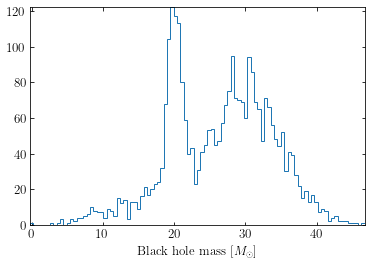

In [123]:
plt.hist(X,bins=100,histtype='step');
plt.xlabel("Black hole mass $[M_\odot]$")
print(X)

In [148]:
#------------------------------------------------------------
# Learn the best-fit GaussianMixture models
#  Here we'll use scikit-learn's GaussianMixture model. The fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 10)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC. 
# It's built in into sklearn.mixture.GaussianMixture 
# but otherwise you can easily compute it from the maximum likelihood
AIC = [m.aic(X) for m in models]


Text(0, 0.5, 'information criterion')

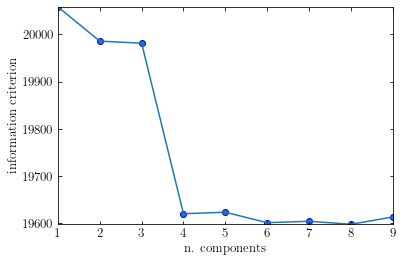

In [149]:
plt.plot(N, AIC,)
plt.scatter(N, AIC)

plt.xlabel('n. components')
plt.ylabel('information criterion')
#plt.legend(loc=2);


In [110]:
print('The AIC is minimized for N=', N[np.argmin(AIC)])

The AIC is minimized for N= 3


Which indeed is our true value. Let's plot this specific solution now:

Text(0.5, 0, 'Black hole mass $[M_\\odot]$')

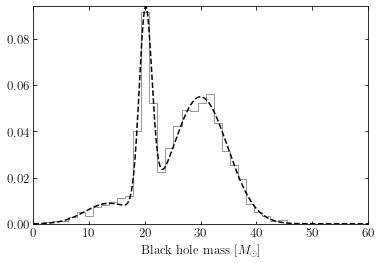

In [26]:
M_best = models[np.argmin(AIC)]

x = np.linspace(0, 60, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)

plt.hist(X, 30, density=True, histtype='step', alpha=0.4,color='black')

plt.plot(x, pdf, '--k')

plt.xlabel("Black hole mass $[M_\odot]$")

That's a nice fit! Let's add the individual modes now.

Text(0.5, 0, 'Black hole mass $[M_\\odot]$')

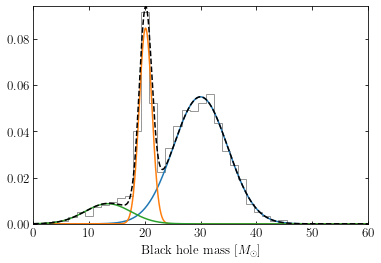

In [28]:
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.hist(X, 30, density=True, histtype='step', alpha=0.4,color='black')
plt.plot(x, pdf_individual[:,0], c='C0')
plt.plot(x, pdf_individual[:,1], c='C1')
plt.plot(x, pdf_individual[:,2], c='C2')
plt.plot(x, pdf, '--k')

plt.xlabel("Black hole mass $[M_\odot]$")

Another way of representing the responsibilities

Text(0, 0.5, '$p({\\rm class})$')

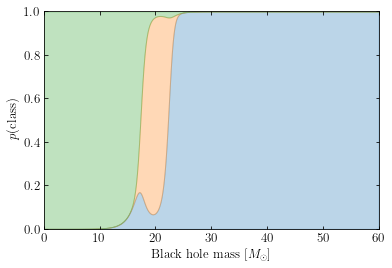

In [29]:
p = responsibilities
#p = p[:, (0, 1, 2)]  # rearrange order so the plot looks better
p = p.cumsum(axis=1).T

plt.fill_between(x, 0, p[0], color='C0', alpha=0.3)
plt.fill_between(x, p[0], p[1], color='C1', alpha=0.3)
plt.fill_between(x, p[1], 1, color='C2', alpha=0.3)
#plt.xlim(-6, 6)
plt.ylim(0, 1)
plt.xlabel("Black hole mass $[M_\odot]$")

plt.ylabel(r'$p({\rm class})$')

#plt.text(-5, 0.3, 'class 1', rotation='vertical')
#plt.text(0, 0.5, 'class 2', rotation='vertical')
#plt.text(3, 0.3, 'class 3', rotation='vertical')
